## IMPORTING LIBRARIES

In [2]:
import tensorflow as tf
import numpy as np

import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np

# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import preprocessing

## IMPORTING THE DATASET

In [3]:
shayari = pd.read_csv("dataset.csv", encoding='utf-16', header=None, sep='\t', names=['text','labels'])

## STUDYING THE DATASET

In [4]:
print(shayari.head())

                                                text     labels
0  سنا ہے لوگ اسے آنکھ بھر کے دیکھتے ہیں ; سو اس ...  احمد فراز
1  سنا ہے ربط ہے اس کو خراب حالوں سے ; سو اپنے آپ...  احمد فراز
2  سنا ہے درد کی گاہک ہے چشم ناز اس کی ; سو ہم بھ...  احمد فراز
3  سنا ہے اس کو بھی ہے شعر و شاعری سے شغف ; سو ہم...  احمد فراز
4  سنا ہے بولے تو باتوں سے پھول جھڑتے ہیں ; یہ با...  احمد فراز


In [4]:
print(shayari['labels'].unique())

['احمد فراز' 'علامہ اقبال' 'فیض احمد فیض' 'حیدر علی آتش' 'جون ایلیا'
 'مرزا غالب' 'مير تقی میر' 'منیر نیازی' 'نظیر اکبر آبادی' 'ندا فاضلی'
 'پروین شاکر' 'قتیل شفائی' 'سراج اورنگ آبادی' 'ریاضؔ خیرآبادی' 'ظفر اقبال']


In [57]:
xLabels=["AhmedFaraz","Iqbal","FaizAhmed","HaiderAli","JaunElia","Galib","Mir","MuneerNiazi","NazirAkbar","NidaFazli","ParveenShakir","Quteel","Siraj","Riyaz","Zafar"]

## VISUALISING THE DATASET

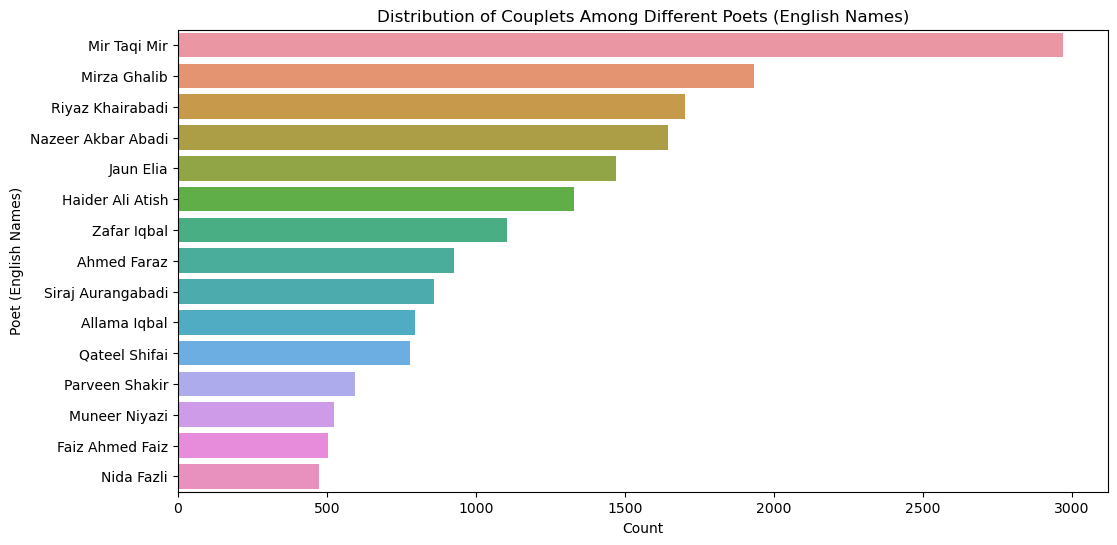

In [5]:
# Mapping dictionary for Urdu poet names to English names
urdu_to_english = {
    'احمد فراز': 'Ahmed Faraz',
    'علامہ اقبال': 'Allama Iqbal',
    'فیض احمد فیض': 'Faiz Ahmed Faiz',
    'حیدر علی آتش': 'Haider Ali Atish',
    'جون ایلیا': 'Jaun Elia',
    'مرزا غالب': 'Mirza Ghalib',
    'مير تقی میر': 'Mir Taqi Mir',
    'منیر نیازی': 'Muneer Niyazi',
    'نظیر اکبر آبادی': 'Nazeer Akbar Abadi',
    'ندا فاضلی': 'Nida Fazli',
    'پروین شاکر': 'Parveen Shakir',
    'قتیل شفائی': 'Qateel Shifai',
    'سراج اورنگ آبادی': 'Siraj Aurangabadi',
    'ریاضؔ خیرآبادی': 'Riyaz Khairabadi',
    'ظفر اقبال': 'Zafar Iqbal'
}

# Replace Urdu poet names with English names in the dataset
shayari['labels'] = shayari['labels'].map(urdu_to_english)

# Plotting the distribution of couplets among different poets with English names
plt.figure(figsize=(12, 6))
sns.countplot(y='labels', data=shayari, order = shayari['labels'].value_counts().index)
plt.title('Distribution of Couplets Among Different Poets (English Names)')
plt.xlabel('Count')
plt.ylabel('Poet (English Names)')
plt.show()


In [7]:
# Calculating basic statistics
poet_counts = shayari['labels'].value_counts()
total_couplets = poet_counts.sum()
average_couplets_per_poet = poet_counts.mean()

print("Total number of couplets:", total_couplets)
print("Average number of couplets per poet:", average_couplets_per_poet)

Total number of couplets: 17609
Average number of couplets per poet: 1173.9333333333334


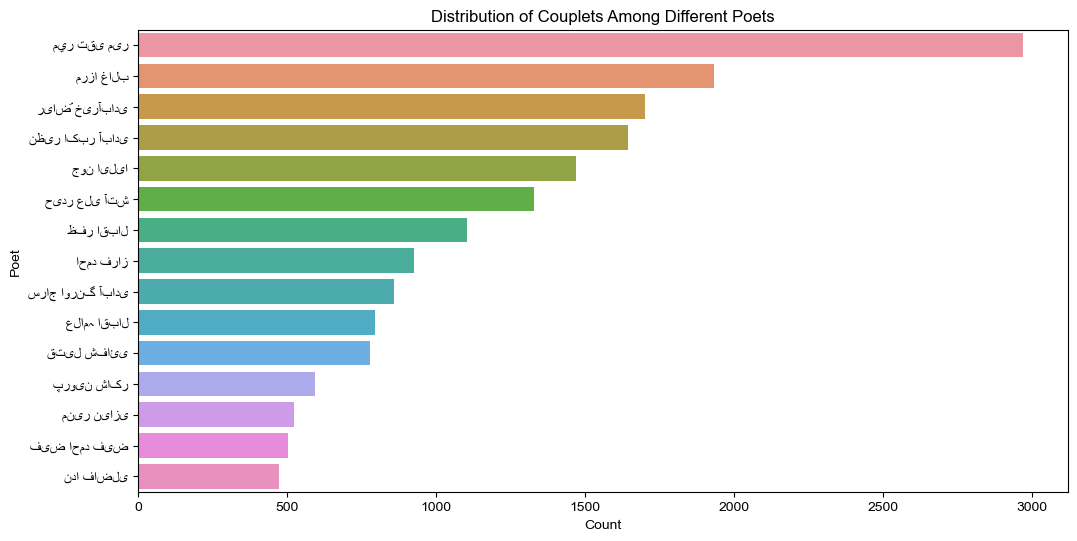

In [9]:
# Plotting the distribution of couplets among different poets
plt.figure(figsize=(12, 6))
sns.countplot(y='labels', data=shayari, order = shayari['labels'].value_counts().index)
plt.title('Distribution of Couplets Among Different Poets')
plt.xlabel('Count')
plt.ylabel('Poet')
plt.show()

In [32]:
labeler = preprocessing.LabelEncoder()
shayari['labels'] = labeler.fit_transform(shayari["labels"])
numLabel=shayari['labels'].tolist()

## N-GRAM (TRIGRAM MODEL)

In [8]:
import nltk

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### PRE-PROCESSING THE DATA

In [10]:
# Tokenize the text at the character level
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(shayari['text'])

In [11]:
# Convert the text to sequences of numerical indices
sequences = tokenizer.texts_to_sequences(shayari['text'])

In [12]:
# Pad the sequences to ensure uniform length
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

In [13]:
# Example of one-hot encoding
num_tokens = len(tokenizer.word_index) + 1  # Add 1 for padding token
one_hot_encoded_sequences = tf.one_hot(padded_sequences, num_tokens)

In [14]:
from nltk.util import ngrams
import random

In [15]:
# Preprocessing
corpus = shayari['text']  # Assuming 'text' contains the couplets
tokenized_lines = [line.split() for line in corpus]  # Tokenize the couplets into words

In [16]:
# Create N-grams
n = 3  # Tri-grams
n_grams = [ngrams(line, n) for line in tokenized_lines]
tri_grams = [tri_gram for line in n_grams for tri_gram in line]

In [17]:
# Build the Model (Frequency Distribution)
tri_gram_freq_dist = nltk.FreqDist(tri_grams)

In [20]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
import random

### VISUALIZING THE FREQUENCY DISTRIBUTION OF TRI-GRAMS

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


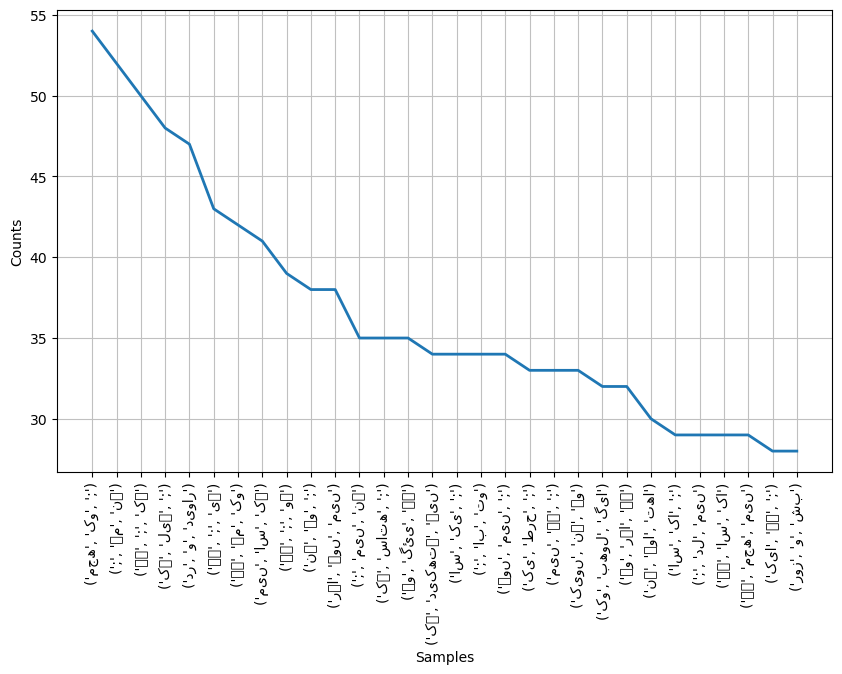

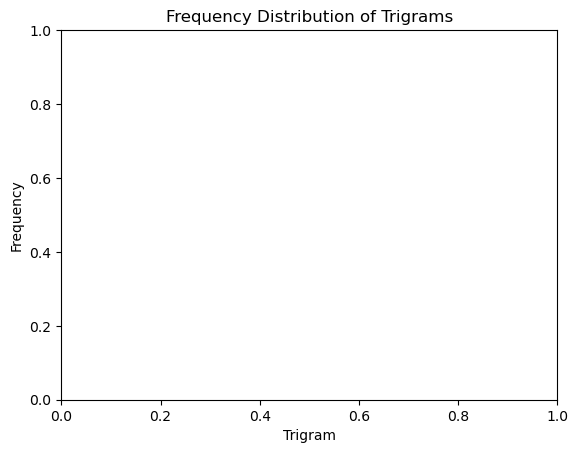

In [21]:
import matplotlib.pyplot as plt

# Calculate frequency distribution of n-grams
n_gram_freq_dist = nltk.FreqDist(tri_grams)

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
n_gram_freq_dist.plot(30, cumulative=False)  # Plot the top 30 most frequent n-grams
plt.title('Frequency Distribution of Trigrams')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.show()

#### 1ST ATTEMPT AT N-GRAM TRIGRAM MODEL

In [22]:
# Preprocessing
corpus = shayari['text']  # Assuming 'text' contains the couplets

In [23]:
# Tokenize the text using a regular expression tokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokenized_text = [tokenizer.tokenize(couplet) for couplet in corpus]

In [24]:
# Divide the tokenized text into training and test sets
train_size = int(0.8 * len(tokenized_text))
train_data = tokenized_text[:train_size]
test_data = tokenized_text[train_size:]

In [25]:
# Model: Calculate n-grams for the training data
n = 3  # Tri-grams
n_grams = [ngrams(line, n) for line in train_data]
tri_grams = [tri_gram for line in n_grams for tri_gram in line]

In [26]:
# Build the probabilistic model (Frequency Distribution)
tri_gram_freq_dist = FreqDist(tri_grams)

In [27]:
# Poetry Generation
seed = ["سنا", "ہے"]  # Seed phrase to start the generation
generated_lines = []
current_seed = seed

In [28]:
# Generate 10 lines of poetry
for _ in range(2):
    possible_tri_grams = [tri_gram for tri_gram in tri_grams if tri_gram[:2] == tuple(current_seed)]
    if not possible_tri_grams:
        break  # If no tri-gram matches the seed, stop generation
    next_tri_gram = random.choice(possible_tri_grams)
    generated_line = ' '.join(next_tri_gram)
    generated_lines.append(generated_line)
    current_seed = next_tri_gram[1:]  # Update seed for next iteration

In [29]:
# Print the generated poetry
for line in generated_lines:
    print(line)

سنا ہے نشاں
ہے نشاں میرا


In [30]:
# Initialize seed words
seed = ["سنا", "ہے"]  # Seed phrase to start the generation
generated_sequence = seed

# Generate 10 words after the seed words
num_words_to_generate = 10
for _ in range(num_words_to_generate):
    # Predict the next word based on the current seed words
    possible_tri_grams = [tri_gram for tri_gram in tri_grams if tri_gram[:2] == tuple(seed)]
    if not possible_tri_grams:
        break  # If no tri-gram matches the seed, stop generation
    next_tri_gram = random.choice(possible_tri_grams)
    next_word = next_tri_gram[-1]  # Get the last word of the tri-gram
    generated_sequence.append(next_word)
    # Update seed for next iteration
    seed = [generated_sequence[-2], generated_sequence[-1]]

# Print the generated sequence
print(' '.join(generated_sequence))

سنا ہے اس کے تئیں اس صید ناتواں کا ہزار توڑا لوٹ


#### 2ND N-GRAM TRIGRAM MODEL

In [56]:
# Initialize seed words
seed = ["سنا", "ہے"]  # Seed phrase to start the generation

# Initialize two lines (couplet)
couplet = ['', '']

# Generate words for the first line
num_words_first_line = 6  # Adjust as needed
for _ in range(num_words_first_line):
    # Predict the next word based on the current seed words
    possible_tri_grams = [tri_gram for tri_gram in tri_grams if tri_gram[:2] == tuple(seed)]
    if not possible_tri_grams:
        break  # If no tri-gram matches the seed, stop generation
    next_tri_gram = random.choice(possible_tri_grams)
    next_word = next_tri_gram[-1]  # Get the last word of the tri-gram
    couplet[0] += ' ' + next_word  # Append the next word to the first line
    # Update seed for next iteration
    seed = [seed[-1], next_word]

# Use the last two words of the generated first line as seed words for the second line
seed = couplet[0].split()[-2:]

# Generate words for the second line
num_words_second_line = 6  # Adjust as needed
for _ in range(num_words_second_line):
    # Predict the next word based on the current seed words
    possible_tri_grams = [tri_gram for tri_gram in tri_grams if tri_gram[:2] == tuple(seed)]
    if not possible_tri_grams:
        break  # If no tri-gram matches the seed, stop generation
    next_tri_gram = random.choice(possible_tri_grams)
    next_word = next_tri_gram[-1]  # Get the last word of the tri-gram
    couplet[1] += ' ' + next_word  # Append the next word to the second line
    # Update seed for next iteration
    seed = [seed[-1], next_word]

# Print the generated couplet
print("First line:", couplet[0])
print("Second line:", couplet[1])

First line:  بولے تو باتوں سے پھول سے
Second line:  کب تک ترا دل نہ چھوڑیں


#### EVALUATION METRICS (RHYME SCORE AND BLEU SCORE)

In [58]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.metrics import edit_distance

# Reference couplets for comparison
reference_couplets = [
    ("سنا ہے لوگ اسے آنکھ بھر کے دیکھتے ہیں", "سو اس کے شہر میں کچھ دن ٹھہر کے دیکھتے ہیں"),
    # Add more reference couplets as needed
]

# Generated couplets
generated_couplets = [
    ("رات جدائی کی گھڑی کھڑی ہے", "سر رشتۂ سلامت ہے ہات کی"),
    # Add your generated couplets here
]

# Rhyme score calculation
def calculate_rhyme_score(generated_couplets, reference_couplets):
    total_score = 0
    for gen_couplet, ref_couplet in zip(generated_couplets, reference_couplets):
        gen_last_word = gen_couplet[1].split()[-1]
        ref_last_word = ref_couplet[1].split()[-1]
        # Calculate similarity score (edit distance for simplicity)
        similarity_score = 1 / (1 + edit_distance(gen_last_word, ref_last_word))
        total_score += similarity_score
    # Average rhyme score across all couplets
    rhyme_score = total_score / len(generated_couplets)
    return rhyme_score

# BLEU score calculation
def calculate_bleu_score(generated_couplets, reference_couplets):
    total_bleu_score = 0
    for gen_couplet, ref_couplet in zip(generated_couplets, reference_couplets):
        # Tokenize generated and reference couplets
        gen_tokens = [word for line in gen_couplet for word in line.split()]
        ref_tokens = [word for line in ref_couplet for word in line.split()]
        # Calculate BLEU score for the couplet
        bleu_score = sentence_bleu([ref_tokens], gen_tokens)
        total_bleu_score += bleu_score
    # Average BLEU score across all couplets
    avg_bleu_score = total_bleu_score / len(generated_couplets)
    return avg_bleu_score

# Calculate and print the rhyme score
rhyme_score = calculate_rhyme_score(generated_couplets, reference_couplets)
print("Rhyme Score:", rhyme_score)

# Calculate and print the BLEU score
bleu_score = calculate_bleu_score(generated_couplets, reference_couplets)
print("BLEU Score:", bleu_score)


Rhyme Score: 0.3333333333333333
BLEU Score: 5.025547213910947e-232


#### (BLEU SCORE WITH REFERENCE TO ONLY ONE COUPLET)

In [60]:
from nltk.translate.bleu_score import corpus_bleu

# Read reference couplets from a text file
def read_reference_couplets(file_path):
    with open(file_path, 'r', encoding='utf-16-le') as file:
        reference_couplets = [line.strip().split(';') for line in file.readlines()]
    return reference_couplets

# Path to the text file containing reference couplets
reference_file_path = "textdataset.txt"

# Read reference couplets from the text file
all_reference_couplets = read_reference_couplets(reference_file_path)

# Your already generated couplets
generated_couplets = [("بولے تو باتوں سے پھول سے","کب تک ترا دل نہ چھوڑیں"),
    # Add your generated couplets here
]

# Calculate BLEU score with reference text from the text file
def calculate_bleu_score_with_text_file(generated_couplets, all_reference_couplets):
    # Tokenize generated and reference couplets
    gen_tokens = [[word for line in couplet for word in line.split()] for couplet in generated_couplets]
    ref_tokens = [[[word for line in couplet for word in line.split()] for couplet in reference_couplets] 
                  for reference_couplets in all_reference_couplets]
    # Calculate BLEU score for the generated couplets using reference from the text file
    bleu_score = corpus_bleu(ref_tokens, gen_tokens)
    return bleu_score

# Calculate and print the BLEU score with reference text from the text file
bleu_score_with_text_file = calculate_bleu_score_with_text_file(generated_couplets, [all_reference_couplets])
print("BLEU Score with Reference Text from Text File:", bleu_score_with_text_file)


BLEU Score with Reference Text from Text File: 0.7598356856515925


#### BLEU SCORE WITH REFERENCE TO THE WHOLE DATASET

In [61]:
from nltk.translate.bleu_score import corpus_bleu

# Read reference couplets from a text file
def read_reference_couplets(file_path):
    with open(file_path, 'r', encoding='utf-16-le') as file:
        reference_couplets = [line.strip().split(';') for line in file.readlines()]
    return reference_couplets

# Path to the text file containing reference couplets
reference_file_path = "textdataset.txt"

# Read reference couplets from the text file
all_reference_couplets = read_reference_couplets(reference_file_path)

# Your already generated couplets
generated_couplets = [
    ("سنا ہے لوگ اسے آنکھ بھر کے دیکھتے ہیں", "سو اس کے شہر میں کچھ دن گزارے ہیں"),
    # Add your generated couplets here
]

# Calculate BLEU score with reference text from the text file
def calculate_bleu_score_with_text_file(generated_couplets, all_reference_couplets):
    # Tokenize generated and reference couplets
    gen_tokens = [[word for line in couplet for word in line.split()] for couplet in generated_couplets]
    ref_tokens = [[[word for line in couplet for word in line.split()] for couplet in reference_couplets] 
                  for reference_couplets in all_reference_couplets]
    # Calculate BLEU score for the generated couplets using reference from the text file
    bleu_score = corpus_bleu(ref_tokens, gen_tokens)
    return bleu_score

# Calculate and print the BLEU score with reference text from the text file
bleu_score_with_text_file = calculate_bleu_score_with_text_file(generated_couplets, [all_reference_couplets])
print("BLEU Score with Reference Text from Text File:", bleu_score_with_text_file)


BLEU Score with Reference Text from Text File: 0.8865129711365626


## RNN MODELS

### LSTM MODEL

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [113]:
# Load the dataset
shayari = pd.read_csv("dataset.csv", encoding='utf-16', header=None, sep='\t', names=['text','labels'])

#### PRE-PROCESSING FOR LSTM

In [114]:
# Pre-processing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(shayari['text'])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(shayari['text'])
padded_sequences = pad_sequences(sequences, maxlen=10)

In [115]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, shayari['labels'], test_size=0.2, random_state=42)

In [116]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [117]:
num_classes = len(set(shayari['labels']))

model_lstm = Sequential([
    Embedding(len(word_index) + 1, 100, input_length=10),
    LSTM(100),
    Dense(num_classes, activation='softmax')
])


#### 1ST TRY LSTM MODEL

In [118]:
# Model Architecture
model_lstm = Sequential([
    Embedding(len(word_index) + 1, 100, input_length=10),
    LSTM(100),
    Dense(len(set(shayari['labels'])), activation='softmax')
])

In [119]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 100)           1370300   
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 15)                1515      
                                                                 
Total params: 1452215 (5.54 MB)
Trainable params: 1452215 (5.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [120]:
# Model Training
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_lstm.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test, y_test_encoded))


Epoch 1/50


441/441 [==============================] - 17s 31ms/step - loss: 2.2224 - accuracy: 0.2886 - val_loss: 1.7955 - val_accuracy: 0.4364
Epoch 2/50
441/441 [==============================] - 12s 26ms/step - loss: 1.3417 - accuracy: 0.5824 - val_loss: 1.4803 - val_accuracy: 0.5398
Epoch 3/50
441/441 [==============================] - 12s 26ms/step - loss: 0.8029 - accuracy: 0.7555 - val_loss: 1.5211 - val_accuracy: 0.5480
Epoch 4/50
441/441 [==============================] - 12s 27ms/step - loss: 0.4900 - accuracy: 0.8514 - val_loss: 1.5768 - val_accuracy: 0.5525
Epoch 5/50
441/441 [==============================] - 12s 27ms/step - loss: 0.2980 - accuracy: 0.9138 - val_loss: 1.8109 - val_accuracy: 0.5389
Epoch 6/50
441/441 [==============================] - 12s 27ms/step - loss: 0.1907 - accuracy: 0.9450 - val_loss: 1.9848 - val_accuracy: 0.5312
Epoch 7/50
441/441 [==============================] - 12s 27ms/step - loss: 0.1307 - accuracy: 0.9633 - val_loss: 2.1801 - val_accura

In [121]:
loss, accuracy = model_lstm.evaluate(X_test, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

111/111 [==============================] - 1s 5ms/step - loss: 5.2222 - accuracy: 0.4989
Test Loss: 5.222244739532471
Test Accuracy: 0.4988642930984497


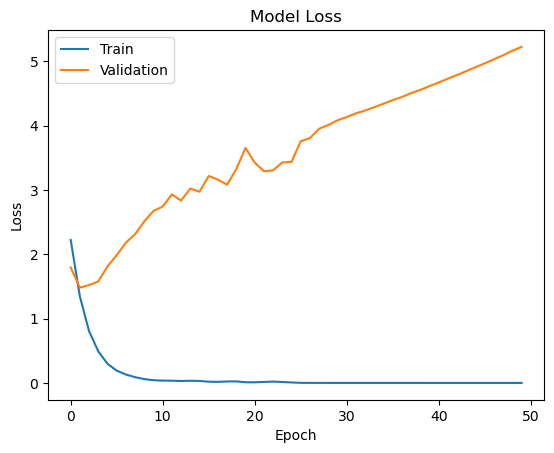

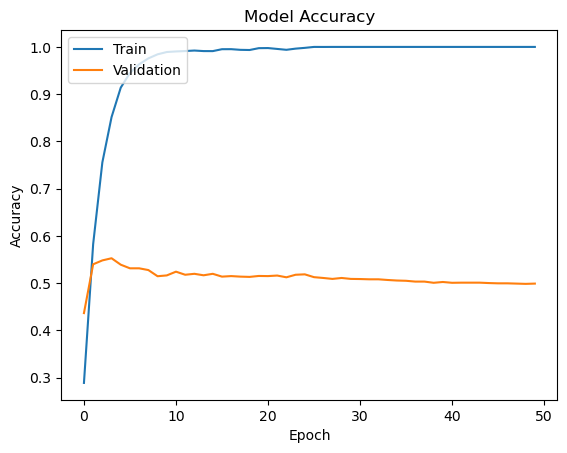

In [122]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [123]:
# Function to generate a couplet given a seed couplet using the trained LSTM model
def generate_couplet(seed_couplet, model, tokenizer, max_length):
    # Tokenize the seed couplet
    seed_sequence = tokenizer.texts_to_sequences([seed_couplet])
    padded_sequence = pad_sequences(seed_sequence, maxlen=max_length)
    
    # Generate the first line of the couplet
    generated_sequence = seed_sequence[0]  # Initialize with the seed sequence
    for _ in range(max_length):
        predicted_prob = model.predict(padded_sequence)[0]
        predicted_label = np.argmax(predicted_prob)  # Select the label with the highest probability
        generated_sequence.append(predicted_label)
        padded_sequence = pad_sequences([generated_sequence], maxlen=max_length)
    
    # Decode the generated sequence back to text, excluding the seed couplet
    generated_couplet = tokenizer.sequences_to_texts([generated_sequence])[0]
    generated_couplet = ' '.join(generated_couplet.split()[2:])  # Exclude the first two words
    
    # Generate the second line of the couplet
    generated_sequence = generated_sequence[1:]  # Exclude the first word of the generated sequence
    for _ in range(max_length):
        predicted_prob = model.predict(padded_sequence)[0]
        predicted_label = np.argmax(predicted_prob)  # Select the label with the highest probability
        generated_sequence.append(predicted_label)
        padded_sequence = pad_sequences([generated_sequence], maxlen=max_length)
    
    # Decode the generated sequence back to text, excluding the seed couplet
    second_line = tokenizer.sequences_to_texts([generated_sequence])[0]
    second_line = ' '.join(second_line.split()[2:])  # Exclude the first two words
    
    return generated_couplet, second_line

# Example usage
seed_couplet = "سنا ہے لوگ اسے آنکھ بھر کے دیکھتے ہیں سو اس کے شہر میں کچھ دن ٹھہر کے دیکھتے"  # Provide your seed couplet here
generated_first_line, generated_second_line = generate_couplet(seed_couplet, model_lstm, tokenizer, max_length=10)  # Assuming max_length is 10
print("Generated Couplet (Two Lines):")
print(generated_first_line)
print(generated_second_line)


1/1 [==============================] - 0s 28ms/step
Generated Couplet (Two Lines):
لوگ اسے آنکھ بھر کے دیکھتے ہیں سو اس کے شہر میں کچھ دن ٹھہر کے دیکھتے کیا ہے ہے ہے ہے ہے
اسے آنکھ بھر کے دیکھتے ہیں سو اس کے شہر میں کچھ دن ٹھہر کے دیکھتے کیا ہے ہے ہے ہے ہے ہے ہے ہے میں میں میں نہ نہ نہ نہ


In [124]:
# Function to generate a couplet given a seed couplet using the trained LSTM model
def generate_couplet(seed_couplet, model, tokenizer, max_length):
    # Tokenize the seed couplet
    seed_sequence = tokenizer.texts_to_sequences([seed_couplet])
    padded_sequence = pad_sequences(seed_sequence, maxlen=max_length)
    
    # Generate the next couplet using the model
    generated_sequence = seed_sequence[0]  # Initialize with the seed sequence
    for _ in range(max_length):
        predicted_prob = model.predict(padded_sequence)[0]
        predicted_label = np.argmax(predicted_prob)  # Select the label with the highest probability
        generated_sequence.append(predicted_label)
        padded_sequence = pad_sequences([generated_sequence], maxlen=max_length)
    
    # Decode the generated sequence back to text, excluding the seed couplet
    generated_couplet = tokenizer.sequences_to_texts([generated_sequence])[0]
    generated_couplet = ' '.join(generated_couplet.split()[2:])  # Exclude the first two words
    
    return generated_couplet

# Example usage
seed_couplet = "سنا ہے"  # Provide your seed couplet here
generated_couplet = generate_couplet(seed_couplet, model_lstm, tokenizer, max_length=10)  # Assuming max_length is 10
print("Generated Couplet (Two Lines):")
print(generated_couplet)


1/1 [==============================] - 0s 26ms/step
Generated Couplet (Two Lines):
لوگ اسے آنکھ بھر کے دیکھتے ہیں سو اس کے شہر میں کچھ دن ٹھہر کے دیکھتے ہیں کیا کیا ہے ہے ہے ہے ہے


#### 2ND TRY LSTM MODEL

In [154]:
dataset = pd.read_csv("dataset.csv", encoding='utf-16', header=None, sep='\t', names=['text','labels'])

In [155]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dataset['text'])
total_words = len(tokenizer.word_index) + 1

In [156]:
# Create input sequences using list of tokens
input_sequences = []
for line in dataset['text']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [157]:
# Pad sequences to make them uniform length
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [158]:
# Create predictors and labels
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

In [159]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

In [160]:
# Define LSTM model
embedding_dim = 100
lstm_units = 100

model = Sequential()
model.add(Embedding(total_words, embedding_dim, input_length=max_sequence_len-1))
model.add(LSTM(lstm_units))
model.add(Dense(total_words, activation='softmax'))

In [161]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [162]:
# Train the model
model.fit(predictors, label, epochs=3, verbose=1)

Epoch 1/3
8623/8623 [==============================] - 544s 63ms/step - loss: 6.7315 - accuracy: 0.0573
Epoch 2/3
8623/8623 [==============================] - 540s 63ms/step - loss: 6.2425 - accuracy: 0.0902
Epoch 3/3
8623/8623 [==============================] - 530s 61ms/step - loss: 5.9561 - accuracy: 0.1078


In [163]:
# Function to generate poetry
def generate_poetry(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)[0]
        predicted_index = np.argmax(predicted_probs)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

In [164]:
# Example usage to generate poetry
seed_text = "محبت"
generated_poetry = generate_poetry(seed_text, next_words=10)
print("Generated Poetry:")
print(generated_poetry)

Generated Poetry:
محبت میں ہے کہ اس کے دل میں نے کیا کیا


In [167]:
num_couplets = 2
generated_couplets = []

for _ in range(num_couplets):
    seed_text = "محبت"
    couplet1 = generate_poetry(seed_text, next_words=10)
    seed_text = couplet1.split()[-1]  # Set the last word of the first line as the seed for the second line
    couplet2 = generate_poetry(seed_text, next_words=10)  # Generate the second line
    generated_couplets.append((couplet1, couplet2))

# Calculate BLEU score, rhyme score for each pair of generated couplets
for i in range(num_couplets):
    for j in range(i + 1, num_couplets):
        couplet1 = generated_couplets[i][0]
        couplet2 = generated_couplets[j][1]
        print("Line 1:")
        print(couplet1)
        print("Line 2:")
        print(couplet2)

Line 1:
محبت میں ہے کہ اس کے دل میں نے کیا کیا
Line 2:
کیا ہے وہ جو تو اس کے لیے ہے یہ یہ


In [173]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.metrics import edit_distance

# Reference couplets for comparison
reference_couplets = [
    ("سنا ہے لوگ اسے آنکھ بھر کے دیکھتے ہیں", "سو اس کے شہر میں کچھ دن ٹھہر کے دیکھتے ہیں"),
    # Add more reference couplets as needed
]

# Generated couplets
generated_couplets = [
    ("محبت میں ہے کہ اس کے دل میں نے کیا کیا", "کیا ہے وہ جو تو اس کے لیے ہے یہ یہ"),
    # Add your generated couplets here
]

# Rhyme score calculation
def calculate_rhyme_score(generated_couplets, reference_couplets):
    total_score = 0
    for gen_couplet, ref_couplet in zip(generated_couplets, reference_couplets):
        gen_last_word = gen_couplet[1].split()[-1]
        ref_last_word = ref_couplet[1].split()[-1]
        # Calculate similarity score (edit distance for simplicity)
        similarity_score = 1 / (1 + edit_distance(gen_last_word, ref_last_word))
        total_score += similarity_score
    # Average rhyme score across all couplets
    rhyme_score = total_score / len(generated_couplets)
    return rhyme_score

# BLEU score calculation
def calculate_bleu_score(generated_couplets, reference_couplets):
    total_bleu_score = 0
    for gen_couplet, ref_couplet in zip(generated_couplets, reference_couplets):
        # Tokenize generated and reference couplets
        gen_tokens = [word for line in gen_couplet for word in line.split()]
        ref_tokens = [word for line in ref_couplet for word in line.split()]
        # Calculate BLEU score for the couplet
        bleu_score = sentence_bleu([ref_tokens], gen_tokens)
        total_bleu_score += bleu_score
    # Average BLEU score across all couplets
    avg_bleu_score = total_bleu_score / len(generated_couplets)
    return avg_bleu_score

# Calculate and print the rhyme score
rhyme_score = calculate_rhyme_score(generated_couplets, reference_couplets)
print("Rhyme Score:", rhyme_score)

# Calculate and print the BLEU score
bleu_score = calculate_bleu_score(generated_couplets, reference_couplets)
print("BLEU Score:", bleu_score)


Rhyme Score: 0.3333333333333333
BLEU Score: 4.811208997101563e-155


In [175]:
from nltk.translate.bleu_score import corpus_bleu

# Read reference couplets from a text file
def read_reference_couplets(file_path):
    with open(file_path, 'r', encoding='utf-16-le') as file:
        reference_couplets = [line.strip().split(';') for line in file.readlines()]
    return reference_couplets

# Path to the text file containing reference couplets
reference_file_path = "textdataset.txt"

# Read reference couplets from the text file
all_reference_couplets = read_reference_couplets(reference_file_path)

# Your already generated couplets
generated_couplets = [
    ("محبت میں ہے کہ اس کے دل میں نے کیا کیا", "تو نے کیا کیا ہے کہ اس کی ہے یہ جو"),
    # Add your generated couplets here
]

# Calculate BLEU score with reference text from the text file
def calculate_bleu_score_with_text_file(generated_couplets, all_reference_couplets):
    # Tokenize generated and reference couplets
    gen_tokens = [[word for line in couplet for word in line.split()] for couplet in generated_couplets]
    ref_tokens = [[[word for line in couplet for word in line.split()] for couplet in reference_couplets] 
                  for reference_couplets in all_reference_couplets]
    # Calculate BLEU score for the generated couplets using reference from the text file
    bleu_score = corpus_bleu(ref_tokens, gen_tokens)
    return bleu_score

# Calculate and print the BLEU score with reference text from the text file
bleu_score_with_text_file = calculate_bleu_score_with_text_file(generated_couplets, [all_reference_couplets])
print("BLEU Score with Reference Text from Text File:", bleu_score_with_text_file)


BLEU Score with Reference Text from Text File: 0.6584489234269124


In [169]:
num_couplets = 2
generated_couplets = []

for _ in range(num_couplets):
    seed_text = "دل"
    couplet1 = generate_poetry(seed_text, next_words=10)
    seed_text = couplet1.split()[-1]  # Set the last word of the first line as the seed for the second line
    couplet2 = generate_poetry(seed_text, next_words=10)  # Generate the second line
    generated_couplets.append((couplet1, couplet2))

# Calculate BLEU score, rhyme score for each pair of generated couplets
for i in range(num_couplets):
    for j in range(i + 1, num_couplets):
        couplet1 = generated_couplets[i][0]
        couplet2 = generated_couplets[j][1]
        print("Line 1:")
        print(couplet1)
        print("Line 2:")
        print(couplet2)


Line 1:
دل میں کیا ہے کہ اس کی ہے یہ جو تو
Line 2:
تو نے کیا کیا ہے کہ اس کی ہے یہ جو


In [174]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.metrics import edit_distance

# Reference couplets for comparison
reference_couplets = [
    ("سنا ہے لوگ اسے آنکھ بھر کے دیکھتے ہیں", "سو اس کے شہر میں کچھ دن ٹھہر کے دیکھتے ہیں"),
    # Add more reference couplets as needed
]

# Generated couplets
generated_couplets = [
    ("دل میں کیا ہے کہ اس کی ہے یہ جو تو", "کیا ہے وہ جو تو اس کے لیے ہے یہ یہ"),
    # Add your generated couplets here
]

# Rhyme score calculation
def calculate_rhyme_score(generated_couplets, reference_couplets):
    total_score = 0
    for gen_couplet, ref_couplet in zip(generated_couplets, reference_couplets):
        gen_last_word = gen_couplet[1].split()[-1]
        ref_last_word = ref_couplet[1].split()[-1]
        # Calculate similarity score (edit distance for simplicity)
        similarity_score = 1 / (1 + edit_distance(gen_last_word, ref_last_word))
        total_score += similarity_score
    # Average rhyme score across all couplets
    rhyme_score = total_score / len(generated_couplets)
    return rhyme_score

# BLEU score calculation
def calculate_bleu_score(generated_couplets, reference_couplets):
    total_bleu_score = 0
    for gen_couplet, ref_couplet in zip(generated_couplets, reference_couplets):
        # Tokenize generated and reference couplets
        gen_tokens = [word for line in gen_couplet for word in line.split()]
        ref_tokens = [word for line in ref_couplet for word in line.split()]
        # Calculate BLEU score for the couplet
        bleu_score = sentence_bleu([ref_tokens], gen_tokens)
        total_bleu_score += bleu_score
    # Average BLEU score across all couplets
    avg_bleu_score = total_bleu_score / len(generated_couplets)
    return avg_bleu_score

# Calculate and print the rhyme score
rhyme_score = calculate_rhyme_score(generated_couplets, reference_couplets)
print("Rhyme Score:", rhyme_score)

# Calculate and print the BLEU score
bleu_score = calculate_bleu_score(generated_couplets, reference_couplets)
print("BLEU Score:", bleu_score)


Rhyme Score: 0.3333333333333333
BLEU Score: 4.550160538169341e-155


In [172]:
from nltk.translate.bleu_score import corpus_bleu

# Read reference couplets from a text file
def read_reference_couplets(file_path):
    with open(file_path, 'r', encoding='utf-16-le') as file:
        reference_couplets = [line.strip().split(';') for line in file.readlines()]
    return reference_couplets

# Path to the text file containing reference couplets
reference_file_path = "textdataset.txt"

# Read reference couplets from the text file
all_reference_couplets = read_reference_couplets(reference_file_path)

# Your already generated couplets
generated_couplets = [
    ("دل میں کیا ہے کہ اس کی ہے یہ جو تو", "تو نے کیا کیا ہے کہ اس کی ہے یہ جو"),
    # Add your generated couplets here
]

# Calculate BLEU score with reference text from the text file
def calculate_bleu_score_with_text_file(generated_couplets, all_reference_couplets):
    # Tokenize generated and reference couplets
    gen_tokens = [[word for line in couplet for word in line.split()] for couplet in generated_couplets]
    ref_tokens = [[[word for line in couplet for word in line.split()] for couplet in reference_couplets] 
                  for reference_couplets in all_reference_couplets]
    # Calculate BLEU score for the generated couplets using reference from the text file
    bleu_score = corpus_bleu(ref_tokens, gen_tokens)
    return bleu_score

# Calculate and print the BLEU score with reference text from the text file
bleu_score_with_text_file = calculate_bleu_score_with_text_file(generated_couplets, [all_reference_couplets])
print("BLEU Score with Reference Text from Text File:", bleu_score_with_text_file)


BLEU Score with Reference Text from Text File: 0.5169731539571706


### GRU MODEL

In [224]:
dataset = pd.read_csv("dataset.csv", encoding='utf-16', header=None, sep='\t', names=['text','labels'])

In [225]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [231]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

In [240]:
# Load the dataset
shayari = pd.read_csv("dataset.csv", encoding='utf-16', header=None, sep='\t', names=['text', 'labels'])

In [241]:
# Encode labels
label_encoder = LabelEncoder()
shayari['label_encoded'] = label_encoder.fit_transform(shayari['labels'])

In [242]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(shayari['text'])

In [243]:
# Convert text to sequences
sequences = tokenizer.texts_to_sequences(shayari['text'])

# Pad sequences to ensure uniform length
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='pre')

# Prepare training data (input-output pairs)
input_sequences = []
output_sequences = []
for seq in padded_sequences:
    for i in range(1, len(seq)):
        input_seq = seq[:i]
        output_seq = seq[i]
        input_sequences.append(input_seq)
        output_sequences.append(output_seq)

# Pad input sequences to ensure uniform length
max_input_length = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_input_length, padding='pre')

# Convert lists to numpy arrays
input_sequences = np.array(input_sequences)
output_sequences = np.array(output_sequences)

In [244]:
# Define the GRU model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_input_length),
    GRU(120),
    Dense(len(tokenizer.word_index) + 1, activation='softmax')
])

In [245]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 31, 100)           1370300   
                                                                 
 gru (GRU)                   (None, 120)               79920     
                                                                 
 dense_4 (Dense)             (None, 13703)             1658063   
                                                                 
Total params: 3108283 (11.86 MB)
Trainable params: 3108283 (11.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [246]:
# Train the model
history= model.fit(input_sequences, output_sequences, epochs=5, batch_size=128)

Epoch 1/5
4265/4265 [==============================] - 564s 132ms/step - loss: 3.8045 - accuracy: 0.4901
Epoch 2/5
4265/4265 [==============================] - 574s 135ms/step - loss: 3.4691 - accuracy: 0.5098
Epoch 3/5
4265/4265 [==============================] - 595s 139ms/step - loss: 3.2990 - accuracy: 0.5187
Epoch 4/5
4265/4265 [==============================] - 526s 123ms/step - loss: 3.1461 - accuracy: 0.5270
Epoch 5/5
4265/4265 [==============================] - 519s 122ms/step - loss: 3.0049 - accuracy: 0.5351


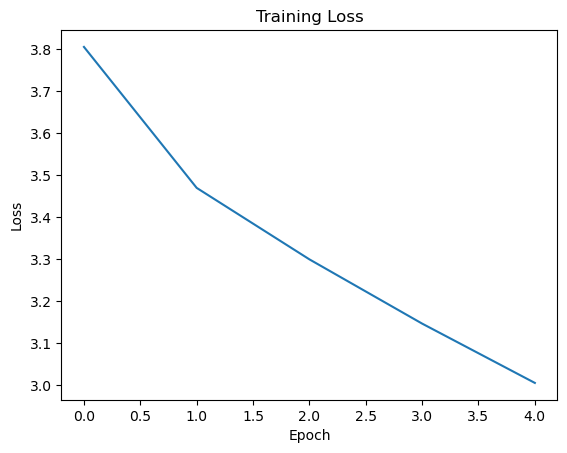

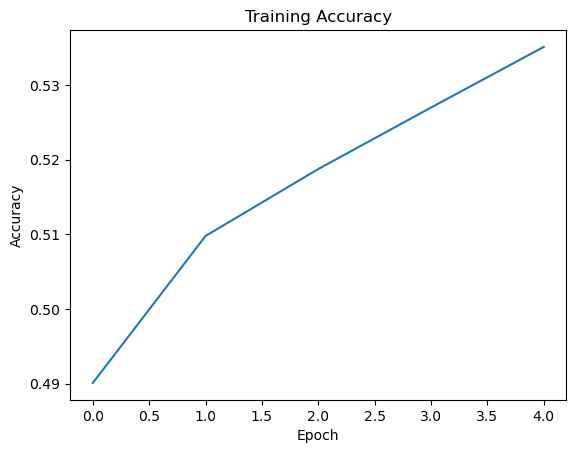

Evaluation Loss: 5.222244739532471
Evaluation Accuracy: 0.4988642930984497


In [251]:
import matplotlib.pyplot as plt
# Plot training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Evaluate the model
print("Evaluation Loss:", loss)
print("Evaluation Accuracy:", accuracy)


In [253]:
def generate_poetry(seed_sequence, max_input_length, tokenizer, model, num_words=20):
    generated_poetry = seed_sequence
    
    for _ in range(num_words):
        # Tokenize the seed sequence
        tokenized_seed = tokenizer.texts_to_sequences([seed_sequence])[0]
        # Pad the seed sequence
        padded_seed = pad_sequences([tokenized_seed], maxlen=max_input_length, padding='pre')
        # Predict the next word
        predicted_word_index = np.argmax(model.predict(padded_seed), axis=-1)
        # Convert the predicted word index back to word
        predicted_word = [word for word, index in tokenizer.word_index.items() if index == predicted_word_index][0]
        # Update the seed sequence with the predicted word
        seed_sequence += " " + predicted_word
        generated_poetry += " " + predicted_word
    
    return generated_poetry

# Example usage:
seed_sequence = "سنا ہے"
generated_poetry = generate_poetry(seed_sequence, max_input_length, tokenizer, model)
print("Generated Poetry:")
print(generated_poetry)


1/1 [==============================] - 0s 32ms/step
Generated Poetry:
سنا ہے اس کی زلفوں کے با وصف میں تو یہ ہے کہ یہ ہے کہ وہ شوخ ہے کہ جس کو


In [254]:
def generate_poetry(seed_sequence, max_input_length, tokenizer, model, num_words_per_line=10):
    generated_poetry = seed_sequence
    for _ in range(2):  # Generate two lines of poetry
        # Generate one line of poetry
        line = seed_sequence
        for _ in range(num_words_per_line):
            # Tokenize the seed sequence
            tokenized_seed = tokenizer.texts_to_sequences([seed_sequence])[0]
            # Pad the seed sequence
            padded_seed = pad_sequences([tokenized_seed], maxlen=max_input_length, padding='pre')
            # Predict the next word
            predicted_word_index = np.argmax(model.predict(padded_seed), axis=-1)
            # Convert the predicted word index back to word
            predicted_word = [word for word, index in tokenizer.word_index.items() if index == predicted_word_index][0]
            # Update the seed sequence with the predicted word
            seed_sequence += " " + predicted_word
            line += " " + predicted_word
        generated_poetry += "\n" + line
    return generated_poetry

# Example usage:
seed_sequence = "سنا ہے"
generated_poetry = generate_poetry(seed_sequence, max_input_length, tokenizer, model)
print("Generated Poetry:")
print(generated_poetry)


1/1 [==============================] - 0s 46ms/step
Generated Poetry:
سنا ہے
سنا ہے اس کی زلفوں کے با وصف میں تو یہ ہے
سنا ہے اس کی زلفوں کے با وصف میں تو یہ ہے کہ یہ ہے کہ وہ شوخ ہے کہ جس کو


In [269]:
import random

def generate_poetry(seed_sequence, max_input_length, tokenizer, model, min_words_per_line=6, max_words_per_line=10):
    generated_poetry = ""
    for _ in range(2):  # Generate two lines of poetry
        # Generate one line of poetry
        seed_sequence_copy = seed_sequence  # Make a copy of the seed sequence for each line
        line = ""
        while len(line.split()) < min_words_per_line or len(line.split()) > max_words_per_line:
            # Reset the seed sequence for each line
            seed_sequence = seed_sequence_copy
            line = seed_sequence
            for _ in range(max_words_per_line):
                # Tokenize the seed sequence
                tokenized_seed = tokenizer.texts_to_sequences([seed_sequence])[0]
                # Pad the seed sequence
                padded_seed = pad_sequences([tokenized_seed], maxlen=max_input_length, padding='pre')
                # Predict the next word
                predicted_word_index = np.argmax(model.predict(padded_seed), axis=-1)
                # Convert the predicted word index back to word
                predicted_word = [word for word, index in tokenizer.word_index.items() if index == predicted_word_index][0]
                # Update the seed sequence with the predicted word
                seed_sequence += " " + predicted_word
                line += " " + predicted_word
                # Break if the line reaches the desired length
                if len(line.split()) >= min_words_per_line:
                    break
        # Add the generated line to the overall poetry
        generated_poetry += line + "\n"
    return generated_poetry.strip()

# Example usage:
seed_sequence = " محبت کے  "
generated_poetry = generate_poetry(seed_sequence, max_input_length, tokenizer, model)
print("Generated Poetry:")
print(generated_poetry)


1/1 [==============================] - 0s 22ms/step
Generated Poetry:
محبت کے   ساتھ ہی سہی ہم
 محبت کے   ساتھ ہی سہی ہم بھی


In [273]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.metrics import edit_distance

# Reference couplets for comparison
reference_couplets = [
    ("سنا ہے لوگ اسے آنکھ بھر کے دیکھتے ہیں", "سو اس کے شہر میں کچھ دن ٹھہر کے دیکھتے ہیں"),
    # Add more reference couplets as needed
]

# Generated couplets
generated_couplets = [
    ("محبت کے ساتھ ہی سہی ہم", "محبت کے ساتھ ہی سہی ہم بھی"),
    # Add your generated couplets here
]

# Rhyme score calculation
def calculate_rhyme_score(generated_couplets, reference_couplets):
    total_score = 0
    for gen_couplet, ref_couplet in zip(generated_couplets, reference_couplets):
        gen_last_word = gen_couplet[1].split()[-1]
        ref_last_word = ref_couplet[1].split()[-1]
        # Calculate similarity score (edit distance for simplicity)
        similarity_score = 1 / (1 + edit_distance(gen_last_word, ref_last_word))
        total_score += similarity_score
    # Average rhyme score across all couplets
    rhyme_score = total_score / len(generated_couplets)
    return rhyme_score

# BLEU score calculation
def calculate_bleu_score(generated_couplets, reference_couplets):
    total_bleu_score = 0
    for gen_couplet, ref_couplet in zip(generated_couplets, reference_couplets):
        # Tokenize generated and reference couplets
        gen_tokens = [word for line in gen_couplet for word in line.split()]
        ref_tokens = [word for line in ref_couplet for word in line.split()]
        # Calculate BLEU score for the couplet
        bleu_score = sentence_bleu([ref_tokens], gen_tokens)
        total_bleu_score += bleu_score
    # Average BLEU score across all couplets
    avg_bleu_score = total_bleu_score / len(generated_couplets)
    return avg_bleu_score

# Calculate and print the rhyme score
rhyme_score = calculate_rhyme_score(generated_couplets, reference_couplets)
print("Rhyme Score:", rhyme_score)

# Calculate and print the BLEU score
bleu_score = calculate_bleu_score(generated_couplets, reference_couplets)
print("BLEU Score:", bleu_score)


Rhyme Score: 0.25
BLEU Score: 6.659308116428607e-232


C:\ProgramData\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\ProgramData\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\ProgramData\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

In [274]:
from nltk.translate.bleu_score import corpus_bleu

# Read reference couplets from a text file
def read_reference_couplets(file_path):
    with open(file_path, 'r', encoding='utf-16-le') as file:
        reference_couplets = [line.strip().split(';') for line in file.readlines()]
    return reference_couplets

# Path to the text file containing reference couplets
reference_file_path = "textdataset.txt"

# Read reference couplets from the text file
all_reference_couplets = read_reference_couplets(reference_file_path)

# Your already generated couplets
generated_couplets = [
    ("محبت کے ساتھ ہی سہی ہم", "محبت کے ساتھ ہی سہی ہم بھی"),
    # Add your generated couplets here
]

# Calculate BLEU score with reference text from the text file
def calculate_bleu_score_with_text_file(generated_couplets, all_reference_couplets):
    # Tokenize generated and reference couplets
    gen_tokens = [[word for line in couplet for word in line.split()] for couplet in generated_couplets]
    ref_tokens = [[[word for line in couplet for word in line.split()] for couplet in reference_couplets] 
                  for reference_couplets in all_reference_couplets]
    # Calculate BLEU score for the generated couplets using reference from the text file
    bleu_score = corpus_bleu(ref_tokens, gen_tokens)
    return bleu_score

# Calculate and print the BLEU score with reference text from the text file
bleu_score_with_text_file = calculate_bleu_score_with_text_file(generated_couplets, [all_reference_couplets])
print("BLEU Score with Reference Text from Text File:", bleu_score_with_text_file)


BLEU Score with Reference Text from Text File: 6.0598953153840875e-78


In [262]:
def generate_poetry(seed_sequence, max_input_length, tokenizer, model, min_words_per_line=6, max_words_per_line=10):
    generated_poetry = ""
    for _ in range(2):  # Generate two lines of poetry
        # Generate one line of poetry
        seed_sequence_copy = seed_sequence  # Make a copy of the seed sequence for each line
        line = ""
        while len(line.split()) < min_words_per_line or len(line.split()) > max_words_per_line:
            # Reset the seed sequence for each line
            seed_sequence = seed_sequence_copy
            line = seed_sequence
            for _ in range(max_words_per_line):
                # Tokenize the seed sequence
                tokenized_seed = tokenizer.texts_to_sequences([seed_sequence])[0]
                # Pad the seed sequence
                padded_seed = pad_sequences([tokenized_seed], maxlen=max_input_length, padding='pre')
                # Predict the next word
                predicted_word_index = np.argmax(model.predict(padded_seed), axis=-1)
                # Convert the predicted word index back to word
                predicted_word = [word for word, index in tokenizer.word_index.items() if index == predicted_word_index][0]
                # Update the seed sequence with the predicted word
                seed_sequence += " " + predicted_word
                line += " " + predicted_word
                # Check if the line length exceeds the minimum required length
                if len(line.split()) >= min_words_per_line:
                    break
            # If the line length exceeds the minimum required length, break the loop
            if len(line.split()) >= min_words_per_line:
                break
        # Add the generated line to the overall poetry
        generated_poetry += line + "\n"
    return generated_poetry.strip()

# Example usage:
seed_sequence = "دل کا"
generated_poetry = generate_poetry(seed_sequence, max_input_length, tokenizer, model)
print("Generated Poetry:")
print(generated_poetry)


1/1 [==============================] - 0s 29ms/step
Generated Poetry:
دل کا ہے اس کی دسترس
دل کا ہے اس کی دسترس میں


In [275]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.metrics import edit_distance

# Reference couplets for comparison
reference_couplets = [
    ("سنا ہے لوگ اسے آنکھ بھر کے دیکھتے ہیں", "سو اس کے شہر میں کچھ دن ٹھہر کے دیکھتے ہیں"),
    # Add more reference couplets as needed
]

# Generated couplets
generated_couplets = [
    ("دل کا ہے اس کی دسترس", " دل کا ہے اس کی دسترس میں"),
    # Add your generated couplets here
]

# Rhyme score calculation
def calculate_rhyme_score(generated_couplets, reference_couplets):
    total_score = 0
    for gen_couplet, ref_couplet in zip(generated_couplets, reference_couplets):
        gen_last_word = gen_couplet[1].split()[-1]
        ref_last_word = ref_couplet[1].split()[-1]
        # Calculate similarity score (edit distance for simplicity)
        similarity_score = 1 / (1 + edit_distance(gen_last_word, ref_last_word))
        total_score += similarity_score
    # Average rhyme score across all couplets
    rhyme_score = total_score / len(generated_couplets)
    return rhyme_score

# BLEU score calculation
def calculate_bleu_score(generated_couplets, reference_couplets):
    total_bleu_score = 0
    for gen_couplet, ref_couplet in zip(generated_couplets, reference_couplets):
        # Tokenize generated and reference couplets
        gen_tokens = [word for line in gen_couplet for word in line.split()]
        ref_tokens = [word for line in ref_couplet for word in line.split()]
        # Calculate BLEU score for the couplet
        bleu_score = sentence_bleu([ref_tokens], gen_tokens)
        total_bleu_score += bleu_score
    # Average BLEU score across all couplets
    avg_bleu_score = total_bleu_score / len(generated_couplets)
    return avg_bleu_score

# Calculate and print the rhyme score
rhyme_score = calculate_rhyme_score(generated_couplets, reference_couplets)
print("Rhyme Score:", rhyme_score)

# Calculate and print the BLEU score
bleu_score = calculate_bleu_score(generated_couplets, reference_couplets)
print("BLEU Score:", bleu_score)


Rhyme Score: 0.5
BLEU Score: 7.369735890165345e-232


In [276]:
from nltk.translate.bleu_score import corpus_bleu

# Read reference couplets from a text file
def read_reference_couplets(file_path):
    with open(file_path, 'r', encoding='utf-16-le') as file:
        reference_couplets = [line.strip().split(';') for line in file.readlines()]
    return reference_couplets

# Path to the text file containing reference couplets
reference_file_path = "textdataset.txt"

# Read reference couplets from the text file
all_reference_couplets = read_reference_couplets(reference_file_path)

# Your already generated couplets
generated_couplets = [
    ("دل کا ہے اس کی دسترس", " دل کا ہے اس کی دسترس میں"),
    # Add your generated couplets here
]

# Calculate BLEU score with reference text from the text file
def calculate_bleu_score_with_text_file(generated_couplets, all_reference_couplets):
    # Tokenize generated and reference couplets
    gen_tokens = [[word for line in couplet for word in line.split()] for couplet in generated_couplets]
    ref_tokens = [[[word for line in couplet for word in line.split()] for couplet in reference_couplets] 
                  for reference_couplets in all_reference_couplets]
    # Calculate BLEU score for the generated couplets using reference from the text file
    bleu_score = corpus_bleu(ref_tokens, gen_tokens)
    return bleu_score

# Calculate and print the BLEU score with reference text from the text file
bleu_score_with_text_file = calculate_bleu_score_with_text_file(generated_couplets, [all_reference_couplets])
print("BLEU Score with Reference Text from Text File:", bleu_score_with_text_file)


BLEU Score with Reference Text from Text File: 0.4324227075463215


In [272]:
import random

def generate_poetry(seed_sequence, max_input_length, tokenizer, model):
    generated_poetry = seed_sequence
    
    # Generate first line of poetry (6-10 words)
    for _ in range(random.randint(6, 10)):
        # Tokenize the seed sequence
        tokenized_seed = tokenizer.texts_to_sequences([seed_sequence])[0]
        # Pad the seed sequence
        padded_seed = pad_sequences([tokenized_seed], maxlen=max_input_length, padding='pre')
        # Predict the next word
        predicted_word_index = np.argmax(model.predict(padded_seed), axis=-1)
        # Convert the predicted word index back to word
        predicted_word = [word for word, index in tokenizer.word_index.items() if index == predicted_word_index][0]
        # Update the seed sequence with the predicted word
        seed_sequence += " " + predicted_word
        generated_poetry += " " + predicted_word
    
    generated_poetry += "\n"  # Add newline between lines
    
    # Generate second line of poetry (6-10 words)
    for _ in range(random.randint(6, 10)):
        # Tokenize the seed sequence (including the first line)
        tokenized_seed = tokenizer.texts_to_sequences([generated_poetry])[0]
        # Pad the seed sequence
        padded_seed = pad_sequences([tokenized_seed], maxlen=max_input_length, padding='pre')
        # Predict the next word
        predicted_word_index = np.argmax(model.predict(padded_seed), axis=-1)
        # Convert the predicted word index back to word
        predicted_word = [word for word, index in tokenizer.word_index.items() if index == predicted_word_index][0]
        # Update the seed sequence with the predicted word
        seed_sequence += " " + predicted_word
        generated_poetry += " " + predicted_word
    
    return generated_poetry

# Example usage:
seed_sequence = "دل بھی مانا نہیں"
generated_poetry = generate_poetry(seed_sequence, max_input_length, tokenizer, model)
print("Generated Poetry:")
print(generated_poetry)


1/1 [==============================] - 0s 30ms/step
Generated Poetry:
دل بھی مانا نہیں کہ اس کے پاس ہے یہ کچھ کچھ
 نہیں ہے کہ اس کے لیے کچھ نہیں ہے یہ


In [277]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.metrics import edit_distance

# Reference couplets for comparison
reference_couplets = [
    ("سنا ہے لوگ اسے آنکھ بھر کے دیکھتے ہیں", "سو اس کے شہر میں کچھ دن ٹھہر کے دیکھتے ہیں"),
    # Add more reference couplets as needed
]

# Generated couplets
generated_couplets = [
    ("دل بھی مانا نہیں کہ اس کے پاس ہے یہ کچھ کچھ", "نہیں ہے کہ اس کے لیے کچھ نہیں ہے یہ"),
    # Add your generated couplets here
]

# Rhyme score calculation
def calculate_rhyme_score(generated_couplets, reference_couplets):
    total_score = 0
    for gen_couplet, ref_couplet in zip(generated_couplets, reference_couplets):
        gen_last_word = gen_couplet[1].split()[-1]
        ref_last_word = ref_couplet[1].split()[-1]
        # Calculate similarity score (edit distance for simplicity)
        similarity_score = 1 / (1 + edit_distance(gen_last_word, ref_last_word))
        total_score += similarity_score
    # Average rhyme score across all couplets
    rhyme_score = total_score / len(generated_couplets)
    return rhyme_score

# BLEU score calculation
def calculate_bleu_score(generated_couplets, reference_couplets):
    total_bleu_score = 0
    for gen_couplet, ref_couplet in zip(generated_couplets, reference_couplets):
        # Tokenize generated and reference couplets
        gen_tokens = [word for line in gen_couplet for word in line.split()]
        ref_tokens = [word for line in ref_couplet for word in line.split()]
        # Calculate BLEU score for the couplet
        bleu_score = sentence_bleu([ref_tokens], gen_tokens)
        total_bleu_score += bleu_score
    # Average BLEU score across all couplets
    avg_bleu_score = total_bleu_score / len(generated_couplets)
    return avg_bleu_score

# Calculate and print the rhyme score
rhyme_score = calculate_rhyme_score(generated_couplets, reference_couplets)
print("Rhyme Score:", rhyme_score)

# Calculate and print the BLEU score
bleu_score = calculate_bleu_score(generated_couplets, reference_couplets)
print("BLEU Score:", bleu_score)

Rhyme Score: 0.3333333333333333
BLEU Score: 4.811208997101563e-155


In [278]:
from nltk.translate.bleu_score import corpus_bleu

# Read reference couplets from a text file
def read_reference_couplets(file_path):
    with open(file_path, 'r', encoding='utf-16-le') as file:
        reference_couplets = [line.strip().split(';') for line in file.readlines()]
    return reference_couplets

# Path to the text file containing reference couplets
reference_file_path = "textdataset.txt"

# Read reference couplets from the text file
all_reference_couplets = read_reference_couplets(reference_file_path)

# Your already generated couplets
generated_couplets = [
    ("دل بھی مانا نہیں کہ اس کے پاس ہے یہ کچھ کچھ", "نہیں ہے کہ اس کے لیے کچھ نہیں ہے یہ"),
    # Add your generated couplets here
]

# Calculate BLEU score with reference text from the text file
def calculate_bleu_score_with_text_file(generated_couplets, all_reference_couplets):
    # Tokenize generated and reference couplets
    gen_tokens = [[word for line in couplet for word in line.split()] for couplet in generated_couplets]
    ref_tokens = [[[word for line in couplet for word in line.split()] for couplet in reference_couplets] 
                  for reference_couplets in all_reference_couplets]
    # Calculate BLEU score for the generated couplets using reference from the text file
    bleu_score = corpus_bleu(ref_tokens, gen_tokens)
    return bleu_score

# Calculate and print the BLEU score with reference text from the text file
bleu_score_with_text_file = calculate_bleu_score_with_text_file(generated_couplets, [all_reference_couplets])
print("BLEU Score with Reference Text from Text File:", bleu_score_with_text_file)


BLEU Score with Reference Text from Text File: 0.5146906560381767
